In [1]:
# ============================================================
# Task 11 – SVM: Breast Cancer Classification
# ============================================================

#  Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)
from sklearn.pipeline import Pipeline
import joblib
from sklearnex import patch_sklearn
patch_sklearn()

import warnings
warnings.filterwarnings("ignore")


Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [2]:

# ============================================================
#  Load Dataset
# ============================================================

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)
print("\nClass Distribution:")
print(y.value_counts())


Dataset Shape: (569, 30)

Class Distribution:
1    357
0    212
Name: count, dtype: int64


In [3]:

# ============================================================
#  Train-Test Split
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [4]:

# ============================================================
#  Baseline SVM – Linear Kernel
# ============================================================

linear_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', probability=True))
])

linear_pipeline.fit(X_train, y_train)
linear_accuracy = linear_pipeline.score(X_test, y_test)

print("\nLinear Kernel Accuracy:", linear_accuracy)



Linear Kernel Accuracy: 0.9736842105263158


In [5]:

# ============================================================
#  SVM – RBF Kernel
# ============================================================

rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

rbf_pipeline.fit(X_train, y_train)
rbf_accuracy = rbf_pipeline.score(X_test, y_test)

print("RBF Kernel Accuracy:", rbf_accuracy)


RBF Kernel Accuracy: 0.9824561403508771


In [6]:

# ============================================================
#  Hyperparameter Tuning – GridSearchCV
# ============================================================

param_grid = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': ['scale', 0.01, 0.001, 0.0001]
}

grid_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', probability=True))
])

grid_search = GridSearchCV(
    grid_pipeline,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_



Best Parameters: {'svm__C': 10, 'svm__gamma': 0.01}
Best CV Accuracy: 0.9802197802197803



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



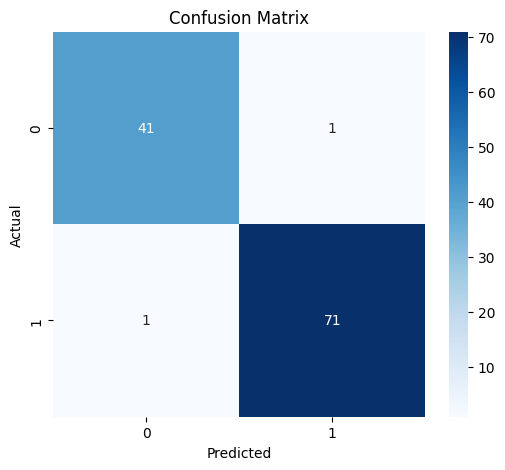

In [7]:

# ============================================================
#  Model Evaluation
# ============================================================

y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


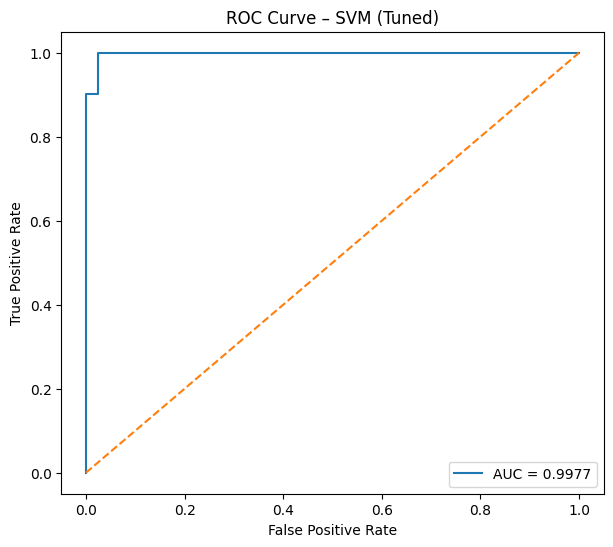


AUC Score: 0.9976851851851851


In [8]:

# ============================================================
#  ROC Curve + AUC
# ============================================================

y_prob = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM (Tuned)")
plt.legend()
plt.show()

print("\nAUC Score:", auc_score)


In [9]:

# ============================================================
#  Save Final Model
# ============================================================

joblib.dump(best_model, "svm_breast_cancer_model.pkl")
print("\nModel saved as 'svm_breast_cancer_model.pkl'")




Model saved as 'svm_breast_cancer_model.pkl'
